In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

696
696
576
576
952
952


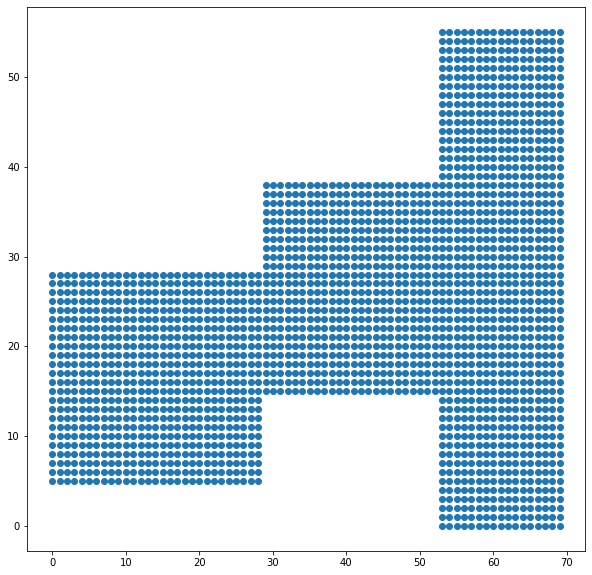

In [17]:
#plotagem de uma área referente ao Prédio do INF/UFG/CAMPUS SAMAMBAIA - GOIÂNIA - GO 
# 2100m²
# Ambiente INDOOR - Tec. WiFi com 20m de raio
# Resultado CPLEX - 3 Gateway

from tqdm import *

plt.figure(figsize=(10,10))

data = pd.DataFrame(columns=[1,2])

listaX = []
listaY = []

squareX1 = [i for i in range(0,29)]*24
squareY1 = [i for i in range(5,29) for j in range(0,29)]

squareX2 = [i for i in range(29,53)]*24
squareY2 = [i for i in range(15,39) for j in range(15,39)]

squareX3 = [i for i in range(53,70)]*56
squareY3 = [i for i in range(0,56) for j in range(53,70)]

TXList = squareX1+squareX2+squareX3
TYList = squareY1+squareY2+squareY3

print (len(squareX1))
print (len(squareY1))
print (len(squareX2))
print (len(squareY2))
print (len(squareX3))
print (len(squareY3))

data[1] = TXList
data[2] = TYList


#data.to_csv('teste.csv', sep=';', index=False)


plt.plot(data[1], data[2], "o")
plt.show()

In [18]:
# from statistics import *
# from sklearn.metrics.pairwise import euclidean_distances
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans

# n_clusters = 7

# KM_clusters = KMeans(n_clusters=n_clusters, init='k-means++').fit(X_numerics) # initialise and fit K-Means model


# #get distances
# dists = euclidean_distances(KM_clusters.cluster_centers_)
# #print (dists)
# tri_dists = dists[np.triu_indices(KM_clusters.n_clusters, 0)]

# tri_dists = tri_dists[tri_dists != 0]
# tri_dists.sort()

# KM_clustered = X_numerics.copy()
# KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_ # append labels to points

# centroids = KM_clusters.cluster_centers_
# print(centroids, '\n')
# dists_pd = pd.DataFrame(dists)
# print('\n',dists_pd)
# print (tri_dists)

# tri_dists_pd = pd.DataFrame(tri_dists)
# tri_dists_pd.describe()

In [19]:
from statistics import *
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


X_numerics = data[[1,2]]
medidas = []
n_clusters = 5

for i in tqdm(range(32)):    # laço de repetição para retornar o resultado das 32 execuções
    KM_clusters = KMeans(n_clusters=n_clusters, init='k-means++').fit(X_numerics)

    dists = euclidean_distances(KM_clusters.cluster_centers_)
    
    tri_dists = dists[np.triu_indices(KM_clusters.n_clusters, 0)]

    tri_dists = tri_dists[tri_dists != 0]
    tri_dists.sort()

    KM_clustered = X_numerics.copy()
    KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_ # append labels to points

    centroids = KM_clusters.cluster_centers_
    dists_pd = pd.DataFrame(dists)

    tri_dists_pd = pd.DataFrame(tri_dists)
    tri_dists_pd.describe()
    
    row = []
    x = tri_dists_pd.describe()[0].values
    for i in x:
        row.append(round(i,5))

    medidas.append(row)
    columns_name = tri_dists_pd.describe()[0].index.to_list()
    
    #centroids = KM_clusters.cluster_centers_
    #print(centroids, '\n')   #posição dos centroids
    #dists_pd = pd.DataFrame(dists)
    #print('\n',dists_pd)    # distancia euclidiana entre os centroids 
 
    
medidas = pd.DataFrame(medidas)
medidas.columns = columns_name

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:05<00:00,  6.20it/s]


In [20]:
medidas

,count,mean,std,min,25%,50%,75%,max
0,10.0,34.29770,14.38324,16.02615,23.92416,31.92147,42.91742,59.10954
1,10.0,34.13943,14.26800,16.36929,23.71356,32.10120,42.32393,58.94174
2,10.0,34.13943,14.26800,16.36929,23.71356,32.10120,42.32393,58.94174
3,10.0,34.14995,14.27227,16.36929,23.71191,32.12128,42.34253,58.96588
4,10.0,34.09747,14.25233,16.30774,23.80076,31.96257,42.33120,58.87232
5,10.0,34.14995,14.27227,16.36929,23.71191,32.12128,42.34253,58.96588
6,10.0,34.14995,14.27227,16.36929,23.71191,32.12128,42.34253,58.96588
7,10.0,34.15965,14.27987,16.32125,23.74887,32.09072,42.39556,58.96122
8,10.0,34.15274,14.27681,16.32125,23.75118,32.08003,42.38984,58.96122
9,10.0,34.17965,14.29918,16.26691,23.78499,32.05330,42.49574,59.02134


In [21]:
medidas.to_csv('medidas_INF-UFG.csv', sep = ',')     # cria um arquivo CSV na pasta atual

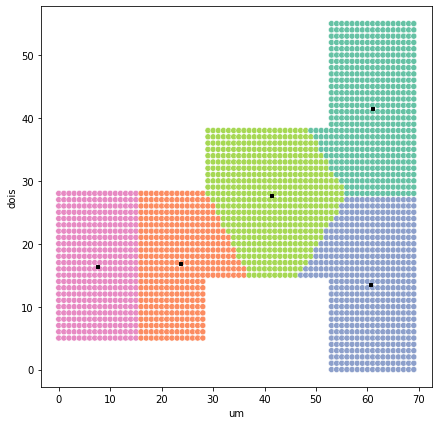

In [22]:
fig, ax = plt.subplots(figsize=(7,7))

KM_clustered.columns = ["um", "dois", "cluster"]

# color = sns.color_palette("Spectral", as_cmap= True)
# sns.scatterplot(x="um", y="dois", data=KM_clustered, hue="cluster", palette=color, legend="")

#(cores - Spectral, icefire)


sns.scatterplot(x="um", y="dois", data=KM_clustered, hue="cluster", palette="Set2", legend="")

ax.scatter(KM_clusters.cluster_centers_[:,0],KM_clusters.cluster_centers_[:,1], marker="s", s=9, c="black")
plt.show()